## 1. Téléchargement et Configuration du Dataset

### 📦 Installation des Dépendances

Avant de commencer, nous devons installer toutes les bibliothèques Python nécessaires pour ce projet.

In [ ]:
import subprocess
import sys

def install_package(package):
    """Installe un package Python avec la version spécifiée"""
    try:
        print(f"Installation/Mise à jour de {package}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", "--upgrade", package])
        print(f"{package} installé/mis à jour avec succès")
    except subprocess.CalledProcessError as e:
        print(f"❌ Erreur lors de l'installation de {package}: {e}")

# Liste des packages requis avec versions spécifiques si nécessaire
required_packages = [
    "pandas",
    "numpy", 
    "matplotlib",
    "seaborn",
    "plotly",
    "scikit-learn",
    "xgboost",
    "kagglehub",
    "nbformat>=4.2.0",  # Version spécifique pour les graphiques interactifs
    "jupyter",
    "ipywidgets"  # Pour l'interactivité dans Jupyter
]

print("Début de l'installation des dépendances...")
print("="*50)

for package in required_packages:
    install_package(package)

print("\n" + "="*50)
print("Toutes les dépendances ont été installées avec succès !")
print("⚠️ IMPORTANT: Redémarrez le kernel après l'installation pour que les changements prennent effet. ⚠️")
print("Vous pouvez maintenant exécuter les cellules suivantes.")

Début de l'installation des dépendances...
Installation/Mise à jour de pandas...
pandas installé/mis à jour avec succès
Installation/Mise à jour de numpy...
pandas installé/mis à jour avec succès
Installation/Mise à jour de numpy...
numpy installé/mis à jour avec succès
Installation/Mise à jour de matplotlib...
numpy installé/mis à jour avec succès
Installation/Mise à jour de matplotlib...
matplotlib installé/mis à jour avec succès
Installation/Mise à jour de seaborn...
matplotlib installé/mis à jour avec succès
Installation/Mise à jour de seaborn...
seaborn installé/mis à jour avec succès
Installation/Mise à jour de plotly...
seaborn installé/mis à jour avec succès
Installation/Mise à jour de plotly...
plotly installé/mis à jour avec succès
Installation/Mise à jour de scikit-learn...
plotly installé/mis à jour avec succès
Installation/Mise à jour de scikit-learn...
scikit-learn installé/mis à jour avec succès
Installation/Mise à jour de xgboost...
scikit-learn installé/mis à jour avec

### 📚 Imports des Bibliothèques

Maintenant que les dépendances sont installées, importons toutes les bibliothèques nécessaires.

In [2]:
# Imports des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Pour le machine learning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import xgboost as xgb

# Configuration pour les graphiques
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_palette("husl")

print("Toutes les bibliothèques ont été importées avec succès !")

Toutes les bibliothèques ont été importées avec succès !


In [3]:
import kagglehub

# Téléchargement de la dernière version
path = kagglehub.dataset_download("kartik2112/fraud-detection")

print("Chemin vers les fichiers du dataset:", path)

# Liste des fichiers dans le dossier
import os
files = os.listdir(path)
print(f"\nFichiers disponibles: {files}")

# Chemin complet vers le fichier CSV principal
data_path = os.path.join(path, 'fraudTrain.csv')
test_path = os.path.join(path, 'fraudTest.csv')

print(f"\nChemin d'entraînement: {data_path}")
print(f"Chemin de test: {test_path}")

Chemin vers les fichiers du dataset: /home/maxime/.cache/kagglehub/datasets/kartik2112/fraud-detection/versions/1

Fichiers disponibles: ['fraudTest.csv', 'fraudTrain.csv']

Chemin d'entraînement: /home/maxime/.cache/kagglehub/datasets/kartik2112/fraud-detection/versions/1/fraudTrain.csv
Chemin de test: /home/maxime/.cache/kagglehub/datasets/kartik2112/fraud-detection/versions/1/fraudTest.csv


## 2. Chargement et Exploration Initiale des Données

In [4]:
print("Chargement des données...")

# Chargement du dataset d'entraînement
df_train = pd.read_csv(data_path)
print(f"Dataset d'entraînement chargé: {df_train.shape}")

# Chargement du dataset de test
df_test = pd.read_csv(test_path)
print(f"Dataset de test chargé: {df_test.shape}")

# Combinaison des deux datasets pour l'analyse exploratoire
df = pd.concat([df_train, df_test], ignore_index=True)
print(f"Dataset complet: {df.shape}")

Chargement des données...
Dataset d'entraînement chargé: (1296675, 23)
Dataset d'entraînement chargé: (1296675, 23)
Dataset de test chargé: (555719, 23)
Dataset complet: (1852394, 23)
Dataset de test chargé: (555719, 23)
Dataset complet: (1852394, 23)


In [5]:
# Affichage des premières lignes
print("🔍 Premières lignes du dataset:")
display(df.head())

print("\n📋 Informations sur le dataset:")
print(f"Nombre de lignes: {df.shape[0]:,}")
print(f"Nombre de colonnes: {df.shape[1]}")
print(f"Taille mémoire: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("Types de données:")
display(df.dtypes)

print("\n🎯 Distribution de la variable cible:")
fraud_counts = df['is_fraud'].value_counts()
fraud_percentage = df['is_fraud'].value_counts(normalize=True) * 100

print(f"Transactions légitimes: {fraud_counts[0]:,} ({fraud_percentage[0]:.2f}%)")
print(f"Transactions frauduleuses: {fraud_counts[1]:,} ({fraud_percentage[1]:.2f}%)")
print(f"Ratio de fraude: {fraud_percentage[1]:.3f}%")

🔍 Premières lignes du dataset:


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0



📋 Informations sur le dataset:
Nombre de lignes: 1,852,394
Nombre de colonnes: 23
Taille mémoire: 1478.57 MB
Types de données:
Taille mémoire: 1478.57 MB
Types de données:


Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object


🎯 Distribution de la variable cible:
Transactions légitimes: 1,842,743 (99.48%)
Transactions frauduleuses: 9,651 (0.52%)
Ratio de fraude: 0.521%


## 3. Préparation et Nettoyage des Données

In [6]:
# Vérification des valeurs manquantes
print("Vérification des valeurs manquantes:")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Colonne': missing_values.index,
    'Valeurs_manquantes': missing_values.values,
    'Pourcentage': missing_percentage.values
})

missing_df = missing_df[missing_df['Valeurs_manquantes'] > 0].sort_values('Valeurs_manquantes', ascending=False)

if len(missing_df) > 0:
    display(missing_df)
else:
    print("Aucune valeur manquante détectée!")

print("Statistiques descriptives des variables numériques:")
display(df.describe())

print("Conversion du format de date...")
# Conversion de la colonne trans_date_trans_time en datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['dob'] = pd.to_datetime(df['dob'])

print("Conversion des dates terminée!")

# Vérification des doublons
print(f"Nombre de doublons: {df.duplicated().sum()}")

Vérification des valeurs manquantes:
Aucune valeur manquante détectée!
Statistiques descriptives des variables numériques:
Aucune valeur manquante détectée!
Statistiques descriptives des variables numériques:


,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,5.371934e+05,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,3.669110e+05,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,2.315490e+05,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,4.630980e+05,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,8.335758e+05,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


Conversion du format de date...
Conversion des dates terminée!
Nombre de doublons: 0
Nombre de doublons: 0


## 4. Analyse Exploratoire des Données (EDA)

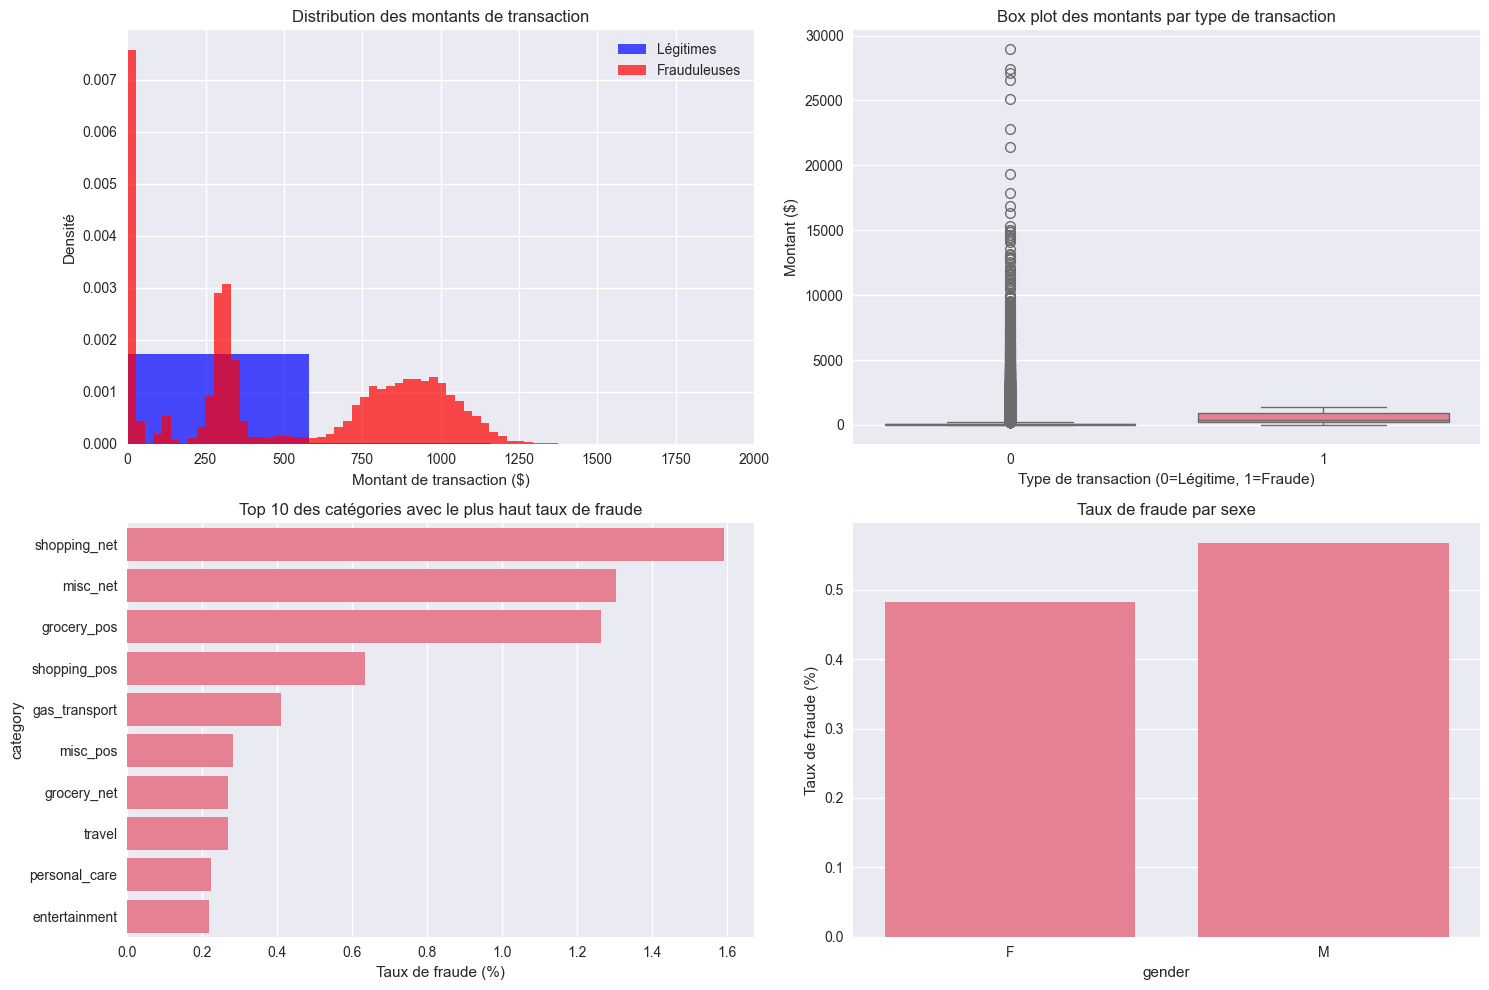

📊 STATISTIQUES PAR TYPE DE TRANSACTION
            count        mean  median         std   min       max
is_fraud                                                         
0         1842743   67.651278   47.24  153.548108  1.00  28948.90
1            9651  530.661412  390.00  391.028873  1.06   1376.04


In [11]:

plt.figure(figsize=(15, 10))

# Distribution des montants par type de transaction
plt.subplot(2, 2, 1)
plt.hist(df[df['is_fraud'] == 0]['amt'], bins=50, alpha=0.7, label='Légitimes', color='blue', density=True)
plt.hist(df[df['is_fraud'] == 1]['amt'], bins=50, alpha=0.7, label='Frauduleuses', color='red', density=True)
plt.xlabel('Montant de transaction ($)')
plt.ylabel('Densité')
plt.title('Distribution des montants de transaction')
plt.legend()
plt.xlim(0, 2000)

# Box plot des montants
plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='is_fraud', y='amt')
plt.title('Box plot des montants par type de transaction')
plt.xlabel('Type de transaction (0=Légitime, 1=Fraude)')
plt.ylabel('Montant ($)')

# Distribution par catégorie de marchand
plt.subplot(2, 2, 3)
category_fraud = df.groupby('category')['is_fraud'].agg(['count', 'sum']).reset_index()
category_fraud['fraud_rate'] = (category_fraud['sum'] / category_fraud['count']) * 100
category_fraud = category_fraud.sort_values('fraud_rate', ascending=False).head(10)

sns.barplot(data=category_fraud, x='fraud_rate', y='category')
plt.title('Top 10 des catégories avec le plus haut taux de fraude')
plt.xlabel('Taux de fraude (%)')

# Distribution par sexe
plt.subplot(2, 2, 4)
gender_fraud = df.groupby('gender')['is_fraud'].agg(['count', 'sum']).reset_index()
gender_fraud['fraud_rate'] = (gender_fraud['sum'] / gender_fraud['count']) * 100

sns.barplot(data=gender_fraud, x='gender', y='fraud_rate')
plt.title('Taux de fraude par sexe')
plt.ylabel('Taux de fraude (%)')

plt.tight_layout()
plt.show()

# Statistiques détaillées
print("📊 STATISTIQUES PAR TYPE DE TRANSACTION")
print("="*50)
stats_by_fraud = df.groupby('is_fraud')['amt'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])
print(stats_by_fraud)

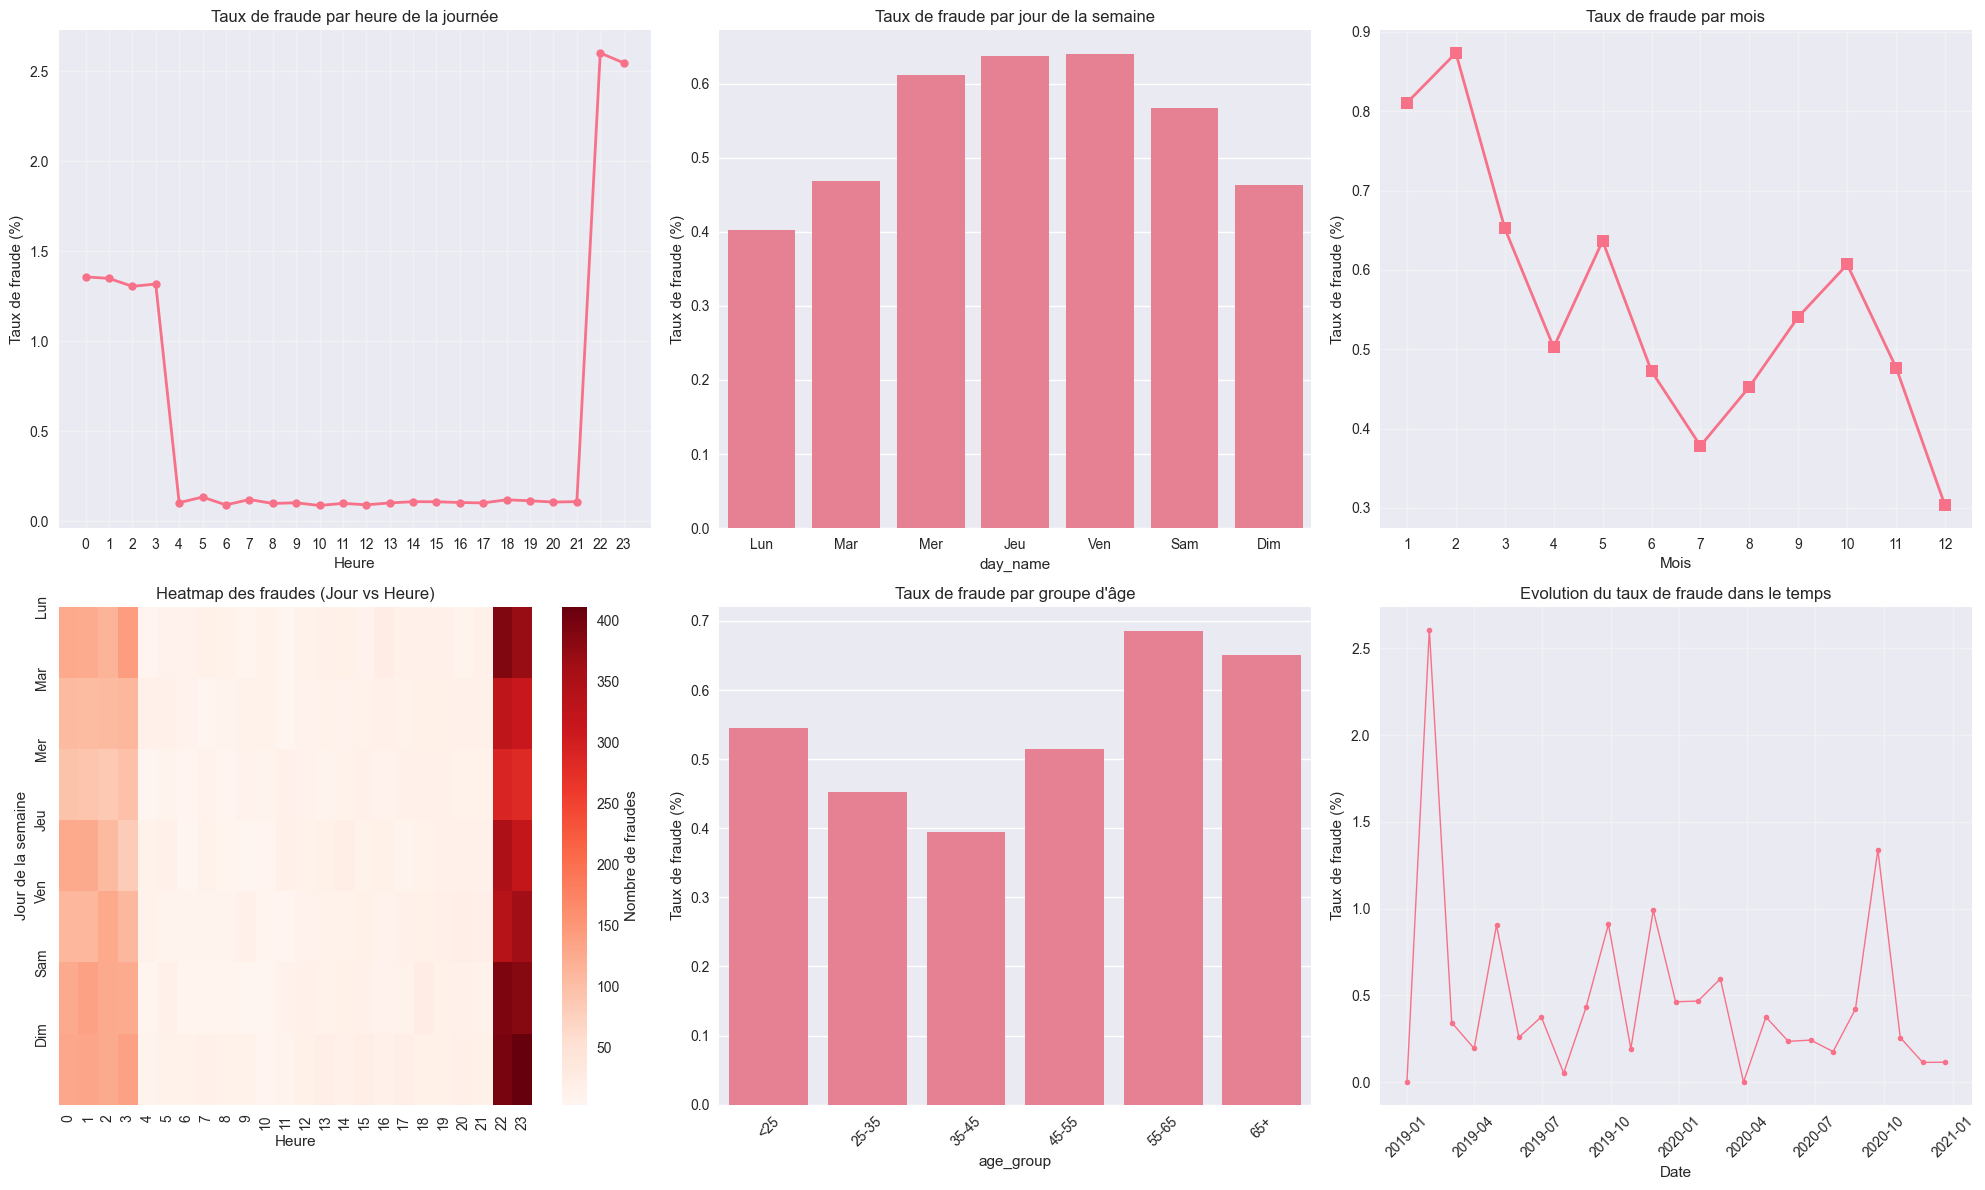

In [12]:
# Analyse temporelle des fraudes
df['hour'] = df['trans_date_trans_time'].dt.hour
df['day_of_week'] = df['trans_date_trans_time'].dt.dayofweek
df['month'] = df['trans_date_trans_time'].dt.month
df['year'] = df['trans_date_trans_time'].dt.year

plt.figure(figsize=(20, 12))

# Fraudes par heure de la journée
plt.subplot(2, 3, 1)
hourly_fraud = df.groupby('hour')['is_fraud'].agg(['count', 'sum']).reset_index()
hourly_fraud['fraud_rate'] = (hourly_fraud['sum'] / hourly_fraud['count']) * 100

plt.plot(hourly_fraud['hour'], hourly_fraud['fraud_rate'], marker='o', linewidth=2, markersize=6)
plt.title('Taux de fraude par heure de la journée')
plt.xlabel('Heure')
plt.ylabel('Taux de fraude (%)')
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24))

# Fraudes par jour de la semaine
plt.subplot(2, 3, 2)
daily_fraud = df.groupby('day_of_week')['is_fraud'].agg(['count', 'sum']).reset_index()
daily_fraud['fraud_rate'] = (daily_fraud['sum'] / daily_fraud['count']) * 100
days = ['Lun', 'Mar', 'Mer', 'Jeu', 'Ven', 'Sam', 'Dim']
daily_fraud['day_name'] = [days[i] for i in daily_fraud['day_of_week']]

sns.barplot(data=daily_fraud, x='day_name', y='fraud_rate')
plt.title('Taux de fraude par jour de la semaine')
plt.ylabel('Taux de fraude (%)')

# Fraudes par mois
plt.subplot(2, 3, 3)
monthly_fraud = df.groupby('month')['is_fraud'].agg(['count', 'sum']).reset_index()
monthly_fraud['fraud_rate'] = (monthly_fraud['sum'] / monthly_fraud['count']) * 100

plt.plot(monthly_fraud['month'], monthly_fraud['fraud_rate'], marker='s', linewidth=2, markersize=8)
plt.title('Taux de fraude par mois')
plt.xlabel('Mois')
plt.ylabel('Taux de fraude (%)')
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 13))

# Heatmap des fraudes par heure et jour de la semaine
plt.subplot(2, 3, 4)
fraud_heatmap = df.groupby(['day_of_week', 'hour'])['is_fraud'].sum().unstack()
sns.heatmap(fraud_heatmap, cmap='Reds', cbar_kws={'label': 'Nombre de fraudes'})
plt.title('Heatmap des fraudes (Jour vs Heure)')
plt.ylabel('Jour de la semaine')
plt.xlabel('Heure')
plt.yticks(ticks=range(7), labels=days)

# Distribution des âges
plt.subplot(2, 3, 5)
df['age'] = (df['trans_date_trans_time'] - df['dob']).dt.days / 365.25
df['age_group'] = pd.cut(df['age'], bins=[0, 25, 35, 45, 55, 65, 100], 
                        labels=['<25', '25-35', '35-45', '45-55', '55-65', '65+'])

age_fraud = df.groupby('age_group')['is_fraud'].agg(['count', 'sum']).reset_index()
age_fraud['fraud_rate'] = (age_fraud['sum'] / age_fraud['count']) * 100

sns.barplot(data=age_fraud, x='age_group', y='fraud_rate')
plt.title('Taux de fraude par groupe d\'âge')
plt.ylabel('Taux de fraude (%)')
plt.xticks(rotation=45)

# Evolution temporelle des fraudes
plt.subplot(2, 3, 6)
df['date'] = df['trans_date_trans_time'].dt.date
daily_trend = df.groupby('date')['is_fraud'].agg(['count', 'sum']).reset_index()
daily_trend['fraud_rate'] = (daily_trend['sum'] / daily_trend['count']) * 100

# Échantillonnage pour la lisibilité
sample_dates = daily_trend[::30]  # Prendre un point tous les 30 jours
plt.plot(pd.to_datetime(sample_dates['date']), sample_dates['fraud_rate'], 
         marker='o', linewidth=1, markersize=4)
plt.title('Evolution du taux de fraude dans le temps')
plt.xlabel('Date')
plt.ylabel('Taux de fraude (%)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Feature Engineering (Ingénierie des Caractéristiques)

In [13]:
# Création de nouvelles caractéristiques
print("Création de nouvelles caractéristiques...")

# Caractéristiques temporelles (déjà créées)
df['hour'] = df['trans_date_trans_time'].dt.hour
df['day_of_week'] = df['trans_date_trans_time'].dt.dayofweek
df['month'] = df['trans_date_trans_time'].dt.month
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)
df['is_night'] = df['hour'].isin(range(22, 24)).astype(int) | df['hour'].isin(range(0, 6)).astype(int)

# Caractéristiques géographiques
# Distance entre le domicile et la transaction (approximation)
def haversine_distance(lat1, lon1, lat2, lon2):
    """Calcule la distance entre deux points géographiques"""
    R = 6371  # Rayon de la Terre en km
    
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    
    return R * c

df['distance_from_home'] = haversine_distance(
    df['lat'], df['long'], df['merch_lat'], df['merch_long']
)

# Caractéristiques de montant
df['amt_log'] = np.log1p(df['amt'])  # Log du montant
df['amt_zscore'] = (df['amt'] - df['amt'].mean()) / df['amt'].std()

# Création de bins pour les montants
df['amt_bin'] = pd.cut(df['amt'], bins=[0, 50, 100, 200, 500, 1000, float('inf')], 
                      labels=['0-50', '50-100', '100-200', '200-500', '500-1000', '1000+'])

# Caractéristiques comportementales par client
print("Calcul des caractéristiques comportementales par client...")

# Nombre de transactions par client
customer_stats = df.groupby('cc_num').agg({
    'amt': ['count', 'mean', 'std', 'min', 'max'],
    'category': lambda x: x.nunique(),
    'merchant': lambda x: x.nunique(),
    'distance_from_home': ['mean', 'max']
}).round(3)

customer_stats.columns = [
    'trans_count', 'amt_mean', 'amt_std', 'amt_min', 'amt_max',
    'unique_categories', 'unique_merchants', 'avg_distance', 'max_distance'
]

# Fusion avec le dataframe principal
df = df.merge(customer_stats, left_on='cc_num', right_index=True, how='left')

# Caractéristiques de fréquence de transaction
df_sorted = df.sort_values(['cc_num', 'trans_date_trans_time'])
df_sorted['time_since_last_trans'] = df_sorted.groupby('cc_num')['trans_date_trans_time'].diff().dt.total_seconds() / 3600  # en heures

# Calcul des moyennes mobiles pour détecter les changements de comportement
df_sorted['amt_rolling_mean'] = df_sorted.groupby('cc_num')['amt'].rolling(window=5, min_periods=1).mean().reset_index(0, drop=True)
df_sorted['amt_deviation'] = abs(df_sorted['amt'] - df_sorted['amt_rolling_mean'])

df = df_sorted.copy()

# Nettoyage des valeurs infinies et NaN
df['time_since_last_trans'] = df['time_since_last_trans'].fillna(0)
df['amt_std'] = df['amt_std'].fillna(0)

print("Nouvelles caractéristiques créées:")
new_features = ['hour', 'day_of_week', 'month', 'is_weekend', 'is_night', 'distance_from_home',
               'amt_log', 'amt_zscore', 'trans_count', 'amt_mean', 'amt_std', 'unique_categories',
               'unique_merchants', 'avg_distance', 'max_distance', 'time_since_last_trans',
               'amt_rolling_mean', 'amt_deviation']

for feature in new_features:
    print(f"  - {feature}")

print(f"\nNombre total de caractéristiques: {len(df.columns)}")

# Aperçu des nouvelles caractéristiques
print("\n📊 Statistiques des nouvelles caractéristiques:")
display(df[new_features].describe())

Création de nouvelles caractéristiques...
Calcul des caractéristiques comportementales par client...
Calcul des caractéristiques comportementales par client...
Nouvelles caractéristiques créées:
  - hour
  - day_of_week
  - month
  - is_weekend
  - is_night
  - distance_from_home
  - amt_log
  - amt_zscore
  - trans_count
  - amt_mean
  - amt_std
  - unique_categories
  - unique_merchants
  - avg_distance
  - max_distance
  - time_since_last_trans
  - amt_rolling_mean
  - amt_deviation

Nombre total de caractéristiques: 48

📊 Statistiques des nouvelles caractéristiques:
Nouvelles caractéristiques créées:
  - hour
  - day_of_week
  - month
  - is_weekend
  - is_night
  - distance_from_home
  - amt_log
  - amt_zscore
  - trans_count
  - amt_mean
  - amt_std
  - unique_categories
  - unique_merchants
  - avg_distance
  - max_distance
  - time_since_last_trans
  - amt_rolling_mean
  - amt_deviation

Nombre total de caractéristiques: 48

📊 Statistiques des nouvelles caractéristiques:


,hour,day_of_week,month,is_weekend,is_night,distance_from_home,amt_log,amt_zscore,trans_count,amt_mean,amt_std,unique_categories,unique_merchants,avg_distance,max_distance,time_since_last_trans,amt_rolling_mean,amt_deviation
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,1.280612e+01,2.967456e+00,7.152067e+00,3.276322e-01,2.996377e-01,7.611173e+01,3.531722e+00,6.947415e-17,2.598802e+03,7.006358e+01,1.432161e+02,1.399568e+01,6.242605e+02,7.611172e+01,1.392985e+02,8.589665e+00,7.004047e+01,5.212085e+01
std,6.815753e+00,2.197983e+00,3.424954e+00,4.693501e-01,4.580994e-01,2.911697e+01,1.288350e+00,1.000000e+00,1.063520e+03,1.867267e+01,6.725178e+01,1.967627e-01,7.056296e+01,2.225208e+00,3.738999e+00,1.258957e+01,7.753850e+01,1.293627e+02
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.225452e-02,6.931472e-01,-4.336693e-01,6.000000e+00,4.590600e+01,7.198800e+01,2.000000e+00,5.000000e+00,5.478600e+01,8.764900e+01,0.000000e+00,1.030000e+00,0.000000e+00
25%,7.000000e+00,1.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,5.532009e+01,2.364620e+00,-3.794164e-01,2.178000e+03,5.969800e+01,1.064800e+02,1.400000e+01,6.130000e+02,7.463700e+01,1.368110e+02,1.579444e+00,3.768400e+01,1.462200e+01
50%,1.400000e+01,3.000000e+00,7.000000e+00,0.000000e+00,0.000000e+00,7.821638e+01,3.880532e+00,-1.419969e-01,2.909000e+03,6.444800e+01,1.272250e+02,1.400000e+01,6.460000e+02,7.594200e+01,1.390990e+02,4.355556e+00,5.613200e+01,3.028800e+01
75%,1.900000e+01,5.000000e+00,1.000000e+01,1.000000e+00,1.000000e+00,9.850947e+01,4.432007e+00,8.185939e-02,3.643000e+03,8.321600e+01,1.562870e+02,1.400000e+01,6.740000e+02,7.767400e+01,1.420090e+02,1.058750e+01,7.988000e+01,5.498800e+01
max,2.300000e+01,6.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,1.521172e+02,1.027332e+01,1.813382e+02,4.392000e+03,9.488180e+02,1.000694e+03,1.400000e+01,6.910000e+02,9.899900e+01,1.521170e+02,3.726308e+02,5.876852e+03,2.312173e+04


## 6. Visualisations Avancées

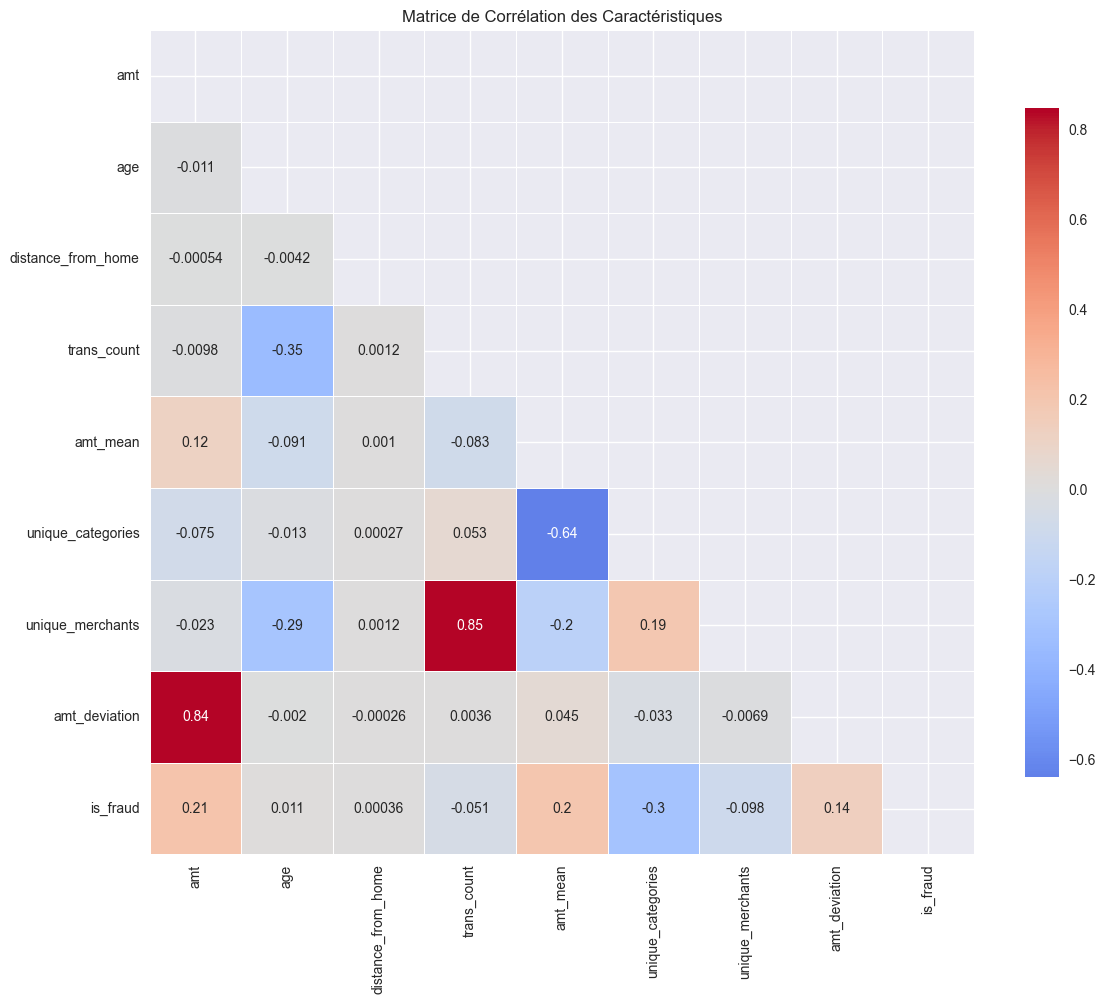

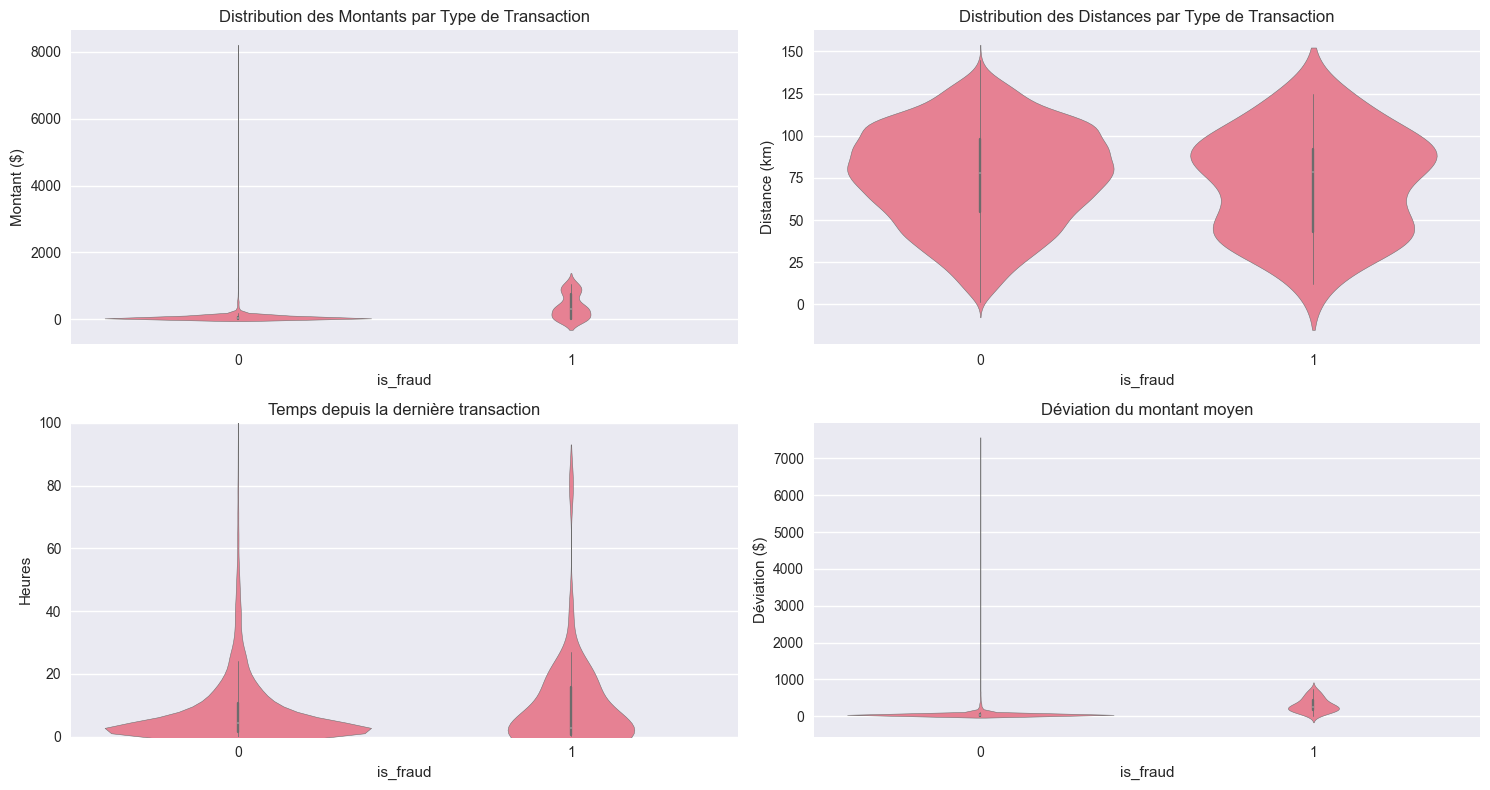

✅ Visualisations avancées générées!


In [ ]:
# Visualisations interactives avec Plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 1. Distribution 3D des transactions
fig = px.scatter_3d(
    df.sample(5000), 
    x='amt', 
    y='distance_from_home', 
    z='hour',
    color='is_fraud',
    color_discrete_map={0: 'blue', 1: 'red'},
    title='Distribution 3D des Transactions (Montant vs Distance vs Heure)',
    labels={'is_fraud': 'Type de transaction'}
)
fig.show()

# 2. Corrélation des caractéristiques
numerical_features = ['amt', 'age', 'distance_from_home', 'trans_count', 'amt_mean', 
                     'unique_categories', 'unique_merchants', 'amt_deviation', 'is_fraud']

plt.figure(figsize=(12, 10))
correlation_matrix = df[numerical_features].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Matrice de Corrélation des Caractéristiques')
plt.tight_layout()
plt.show()

# 3. Analyse géographique des fraudes
fig = px.scatter_mapbox(
    df[df['is_fraud'] == 1].sample(1000),
    lat='merch_lat',
    lon='merch_long',
    color='amt',
    size='amt',
    hover_data=['category', 'state'],
    color_continuous_scale='Reds',
    title='Répartition Géographique des Fraudes',
    mapbox_style='open-street-map',
    height=600
)
fig.show()

# 4. Distribution des montants avec violin plots
plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
sns.violinplot(data=df.sample(10000), x='is_fraud', y='amt')
plt.title('Distribution des Montants par Type de Transaction')
plt.ylabel('Montant ($)')

plt.subplot(2, 2, 2)
sns.violinplot(data=df.sample(10000), x='is_fraud', y='distance_from_home')
plt.title('Distribution des Distances par Type de Transaction')
plt.ylabel('Distance (km)')

plt.subplot(2, 2, 3)
sns.violinplot(data=df.sample(10000), x='is_fraud', y='time_since_last_trans')
plt.title('Temps depuis la dernière transaction')
plt.ylabel('Heures')
plt.ylim(0, 100)  # Limite pour la lisibilité

plt.subplot(2, 2, 4)
sns.violinplot(data=df.sample(10000), x='is_fraud', y='amt_deviation')
plt.title('Déviation du montant moyen')
plt.ylabel('Déviation ($)')

plt.tight_layout()
plt.show()

# 5. Analyse des patterns temporels avec Plotly
hourly_fraud_rate = df.groupby('hour')['is_fraud'].agg(['count', 'sum']).reset_index()
hourly_fraud_rate['fraud_rate'] = (hourly_fraud_rate['sum'] / hourly_fraud_rate['count']) * 100

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=hourly_fraud_rate['hour'],
    y=hourly_fraud_rate['fraud_rate'],
    mode='lines+markers',
    name='Taux de fraude',
    line=dict(color='red', width=3),
    marker=dict(size=8)
))

fig.update_layout(
    title='Evolution du Taux de Fraude par Heure',
    xaxis_title='Heure de la journée',
    yaxis_title='Taux de fraude (%)',
    showlegend=True,
    height=400
)
fig.show()

In [ ]:
print("Préparation des données pour le machine learning...")

# Sélection des caractéristiques pour l'entraînement
features_to_use = [
    'amt', 'lat', 'long', 'merch_lat', 'merch_long', 'age',
    'hour', 'day_of_week', 'month', 'is_weekend', 'is_night',
    'distance_from_home', 'amt_log', 'amt_zscore',
    'trans_count', 'amt_mean', 'amt_std', 'unique_categories',
    'unique_merchants', 'avg_distance', 'max_distance',
    'time_since_last_trans', 'amt_deviation'
]

# Ajout des variables catégorielles encodées
categorical_features = ['category', 'gender', 'state', 'job']

# Encodage des variables catégorielles
le_dict = {}
for col in categorical_features:
    le = LabelEncoder()
    df[f'{col}_encoded'] = le.fit_transform(df[col].astype(str))
    le_dict[col] = le
    features_to_use.append(f'{col}_encoded')

# Création du dataset final
X = df[features_to_use].copy()
y = df['is_fraud'].copy()

# Gestion des valeurs manquantes
X = X.fillna(X.median())

# Remplacement des valeurs infinies - approche corrigée
print("Traitement des valeurs infinies...")
for col in X.columns:
    # Vérifie s'il y a des valeurs infinies dans la colonne
    inf_mask = np.isinf(X[col])
    if inf_mask.any():
        print(f"  - Remplacement de {inf_mask.sum()} valeurs infinies dans {col}")
        X.loc[inf_mask, col] = X[col].replace([np.inf, -np.inf], np.nan).median()

print(f"Forme des données d'entrée: {X.shape}")
print(f"Nombre de caractéristiques: {len(features_to_use)}")

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Ensemble d'entraînement: {X_train.shape[0]} échantillons")
print(f"Ensemble de test: {X_test.shape[0]} échantillons")

# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Données préparées et normalisées!")

# Affichage de la distribution des classes
print(f"\n📊 Distribution des classes:")
print(f"Entraînement - Légitimes: {(y_train == 0).sum():,} ({(y_train == 0).mean()*100:.2f}%)")
print(f"Entraînement - Fraudes: {(y_train == 1).sum():,} ({(y_train == 1).mean()*100:.2f}%)")
print(f"Test - Légitimes: {(y_test == 0).sum():,} ({(y_test == 0).mean()*100:.2f}%)")
print(f"Test - Fraudes: {(y_test == 1).sum():,} ({(y_test == 1).mean()*100:.2f}%)")

# Vérification finale de l'intégrité des données
print(f"Vérification finale:")
print(f"Valeurs manquantes dans X: {X.isnull().sum().sum()}")
print(f"Valeurs infinies dans X: {np.isinf(X.values).sum()}")
print(f"Valeurs manquantes dans y: {y.isnull().sum()}")

Préparation des données pour le machine learning...
Traitement des valeurs infinies...
Forme des données d'entrée: (1852394, 27)
Nombre de caractéristiques: 27
Traitement des valeurs infinies...
Forme des données d'entrée: (1852394, 27)
Nombre de caractéristiques: 27
Ensemble d'entraînement: 1481915 échantillons
Ensemble de test: 370479 échantillons
Ensemble d'entraînement: 1481915 échantillons
Ensemble de test: 370479 échantillons
Données préparées et normalisées!

📊 Distribution des classes:
Entraînement - Légitimes: 1,474,194 (99.48%)
Entraînement - Fraudes: 7,721 (0.52%)
Test - Légitimes: 368,549 (99.48%)
Test - Fraudes: 1,930 (0.52%)

 Vérification finale:
Valeurs manquantes dans X: 0
Valeurs infinies dans X: 0
Valeurs manquantes dans y: 0
Données préparées et normalisées!

📊 Distribution des classes:
Entraînement - Légitimes: 1,474,194 (99.48%)
Entraînement - Fraudes: 7,721 (0.52%)
Test - Légitimes: 368,549 (99.48%)
Test - Fraudes: 1,930 (0.52%)

 Vérification finale:
Valeurs man

In [16]:
# Entraînement de plusieurs modèles de machine learning
import time

print("Entraînement des modèles de machine learning...")
print("="*60)

# Option pour réduire la taille du dataset si nécessaire (pour des tests rapides)
USE_SAMPLE = False  # Changez à True pour un entraînement plus rapide
SAMPLE_SIZE = 100000  # Taille de l'échantillon si USE_SAMPLE = True

if USE_SAMPLE and len(X_train) > SAMPLE_SIZE:
    print(f"⚡ Mode échantillonnage activé: {SAMPLE_SIZE:,} échantillons")
    # Échantillonnage stratifié pour conserver la distribution des classes
    from sklearn.model_selection import train_test_split
    X_train_sample, _, y_train_sample, _ = train_test_split(
        X_train, y_train, 
        train_size=SAMPLE_SIZE, 
        random_state=42, 
        stratify=y_train
    )
    # Mise à jour du scaler avec l'échantillon
    scaler_sample = StandardScaler()
    X_train_scaled_sample = scaler_sample.fit_transform(X_train_sample)
    
    X_train_use = X_train_sample
    X_train_scaled_use = X_train_scaled_sample
    y_train_use = y_train_sample
    print(f"   📊 Distribution des classes dans l'échantillon:")
    print(f"      - Légitimes: {(y_train_use == 0).sum():,} ({(y_train_use == 0).mean()*100:.2f}%)")
    print(f"      - Fraudes: {(y_train_use == 1).sum():,} ({(y_train_use == 1).mean()*100:.2f}%)")
else:
    X_train_use = X_train
    X_train_scaled_use = X_train_scaled
    y_train_use = y_train
    print(f"📊 Utilisation du dataset complet: {len(X_train_use):,} échantillons")

models = {}
results = {}

print(f"\n🎯 Début de l'entraînement sur {len(X_train_use):,} échantillons...")
print("="*60)

# 1. Régression Logistique
print("1️⃣ Entraînement de la Régression Logistique...")
print(f"   📊 Données normalisées: {X_train_scaled.shape}")

lr_model = LogisticRegression(
    random_state=42, 
    max_iter=1000, 
    class_weight='balanced',
    n_jobs=-1,    # Utilise tous les cœurs CPU
    verbose=0     # Pas de verbose pour la régression logistique
)

print("    Début de l'entraînement...")
start_time = time.time()

lr_model.fit(X_train_scaled_use, y_train_use)

end_time = time.time()
training_time = end_time - start_time
print(f"   ✅ Entraînement terminé en {training_time:.1f} secondes!")

models['Logistic Regression'] = lr_model

# 2. Random Forest
print("2️⃣ Entraînement du Random Forest...")

# Version optimisée avec moins d'arbres et plus de contraintes
rf_model = RandomForestClassifier(
    n_estimators=50, 
    random_state=42, 
    class_weight='balanced',
    max_depth=8,
    min_samples_split=20,
    min_samples_leaf=10,
    max_features='sqrt',
    n_jobs=-1,
    verbose=1 
)

print("    Début de l'entraînement...")
start_time = time.time()

rf_model.fit(X_train_use, y_train_use)

end_time = time.time()
training_time = end_time - start_time
print(f"   ✅ Entraînement terminé en {training_time:.1f} secondes!")

models['Random Forest'] = rf_model

# 3. XGBoost
print("3️⃣ Entraînement du XGBoost...")
print("   📊 Calcul du ratio d'équilibrage des classes...")

# Calcul du ratio pour l'équilibrage des classes
scale_pos_weight = (y_train_use == 0).sum() / (y_train_use == 1).sum()
print(f"     Ratio d'équilibrage: {scale_pos_weight:.1f}")

xgb_model = xgb.XGBClassifier(
    random_state=42,
    scale_pos_weight=scale_pos_weight,
    max_depth=6,
    learning_rate=0.1,
    n_estimators=100,
    n_jobs=-1,
    verbosity=1
)

print("    Début de l'entraînement...")
start_time = time.time()

xgb_model.fit(X_train_use, y_train_use)

end_time = time.time()
training_time = end_time - start_time
print(f"   ✅ Entraînement terminé en {training_time:.1f} secondes!")

models['XGBoost'] = xgb_model

print("✅ Tous les modèles ont été entraînés!")

if USE_SAMPLE:
    print(f"   ⚡ Échantillonnage: {SAMPLE_SIZE:,} échantillons utilisés")
print(f"   📊 Dataset d'entraînement utilisé: {len(X_train_use):,} échantillons")

# Fonction d'évaluation
def evaluate_model(model, X_test_data, y_test_data, model_name):
    """Évalue un modèle et retourne les métriques"""
    y_pred = model.predict(X_test_data)
    y_pred_proba = model.predict_proba(X_test_data)[:, 1]
    
    metrics = {
        'Model': model_name,
        'Accuracy': accuracy_score(y_test_data, y_pred),
        'Precision': precision_score(y_test_data, y_pred),
        'Recall': recall_score(y_test_data, y_pred),
        'F1-Score': f1_score(y_test_data, y_pred),
        'ROC-AUC': roc_auc_score(y_test_data, y_pred_proba)
    }
    
    return metrics, y_pred, y_pred_proba

# Évaluation de tous les modèles
print("\n📊 Évaluation des modèles...")

for name, model in models.items():
    print(f"\n Évaluation du modèle: {name}")
    
    # Utilisation des données normalisées pour la régression logistique
    if name == 'Logistic Regression':
        test_data = X_test_scaled
    else:
        test_data = X_test
    
    metrics, y_pred, y_pred_proba = evaluate_model(model, test_data, y_test, name)
    results[name] = {
        'metrics': metrics,
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }
    
    print(f"  Accuracy: {metrics['Accuracy']:.4f}")
    print(f"  Precision: {metrics['Precision']:.4f}")
    print(f"  Recall: {metrics['Recall']:.4f}")
    print(f"  F1-Score: {metrics['F1-Score']:.4f}")
    print(f"  ROC-AUC: {metrics['ROC-AUC']:.4f}")

# Création d'un DataFrame avec tous les résultats
results_df = pd.DataFrame([results[name]['metrics'] for name in results.keys()])
print("\n📋 Comparaison des modèles:")
display(results_df.round(4))

Entraînement des modèles de machine learning...
📊 Utilisation du dataset complet: 1,481,915 échantillons

🎯 Début de l'entraînement sur 1,481,915 échantillons...
1️⃣ Entraînement de la Régression Logistique...
   📊 Données normalisées: (1481915, 27)
    Début de l'entraînement...
   ✅ Entraînement terminé en 4.2 secondes!
2️⃣ Entraînement du Random Forest...
    Début de l'entraînement...
   ✅ Entraînement terminé en 4.2 secondes!
2️⃣ Entraînement du Random Forest...
    Début de l'entraînement...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   47.9s finished
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   47.9s finished


   ✅ Entraînement terminé en 48.3 secondes!
3️⃣ Entraînement du XGBoost...
   📊 Calcul du ratio d'équilibrage des classes...
     Ratio d'équilibrage: 190.9
    Début de l'entraînement...
   ✅ Entraînement terminé en 8.1 secondes!
✅ Tous les modèles ont été entraînés!
   📊 Dataset d'entraînement utilisé: 1,481,915 échantillons

📊 Évaluation des modèles...

 Évaluation du modèle: Logistic Regression
  Accuracy: 0.9485
  Precision: 0.0845
  Recall: 0.9036
  F1-Score: 0.1545
  ROC-AUC: 0.9721

 Évaluation du modèle: Random Forest
   ✅ Entraînement terminé en 8.1 secondes!
✅ Tous les modèles ont été entraînés!
   📊 Dataset d'entraînement utilisé: 1,481,915 échantillons

📊 Évaluation des modèles...

 Évaluation du modèle: Logistic Regression
  Accuracy: 0.9485
  Precision: 0.0845
  Recall: 0.9036
  F1-Score: 0.1545
  ROC-AUC: 0.9721

 Évaluation du modèle: Random Forest


[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=20)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=20)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=20)]: Done  50 out of  50 | elapsed:    0.1s finished


  Accuracy: 0.9829
  Precision: 0.2277
  Recall: 0.9580
  F1-Score: 0.3680
  ROC-AUC: 0.9956

 Évaluation du modèle: XGBoost
  Accuracy: 0.9933
  Precision: 0.4378
  Recall: 0.9782
  F1-Score: 0.6049
  ROC-AUC: 0.9989

📋 Comparaison des modèles:
  Accuracy: 0.9933
  Precision: 0.4378
  Recall: 0.9782
  F1-Score: 0.6049
  ROC-AUC: 0.9989

📋 Comparaison des modèles:


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression,0.9485,0.0845,0.9036,0.1545,0.9721
1,Random Forest,0.9829,0.2277,0.9580,0.3680,0.9956
2,XGBoost,0.9933,0.4378,0.9782,0.6049,0.9989


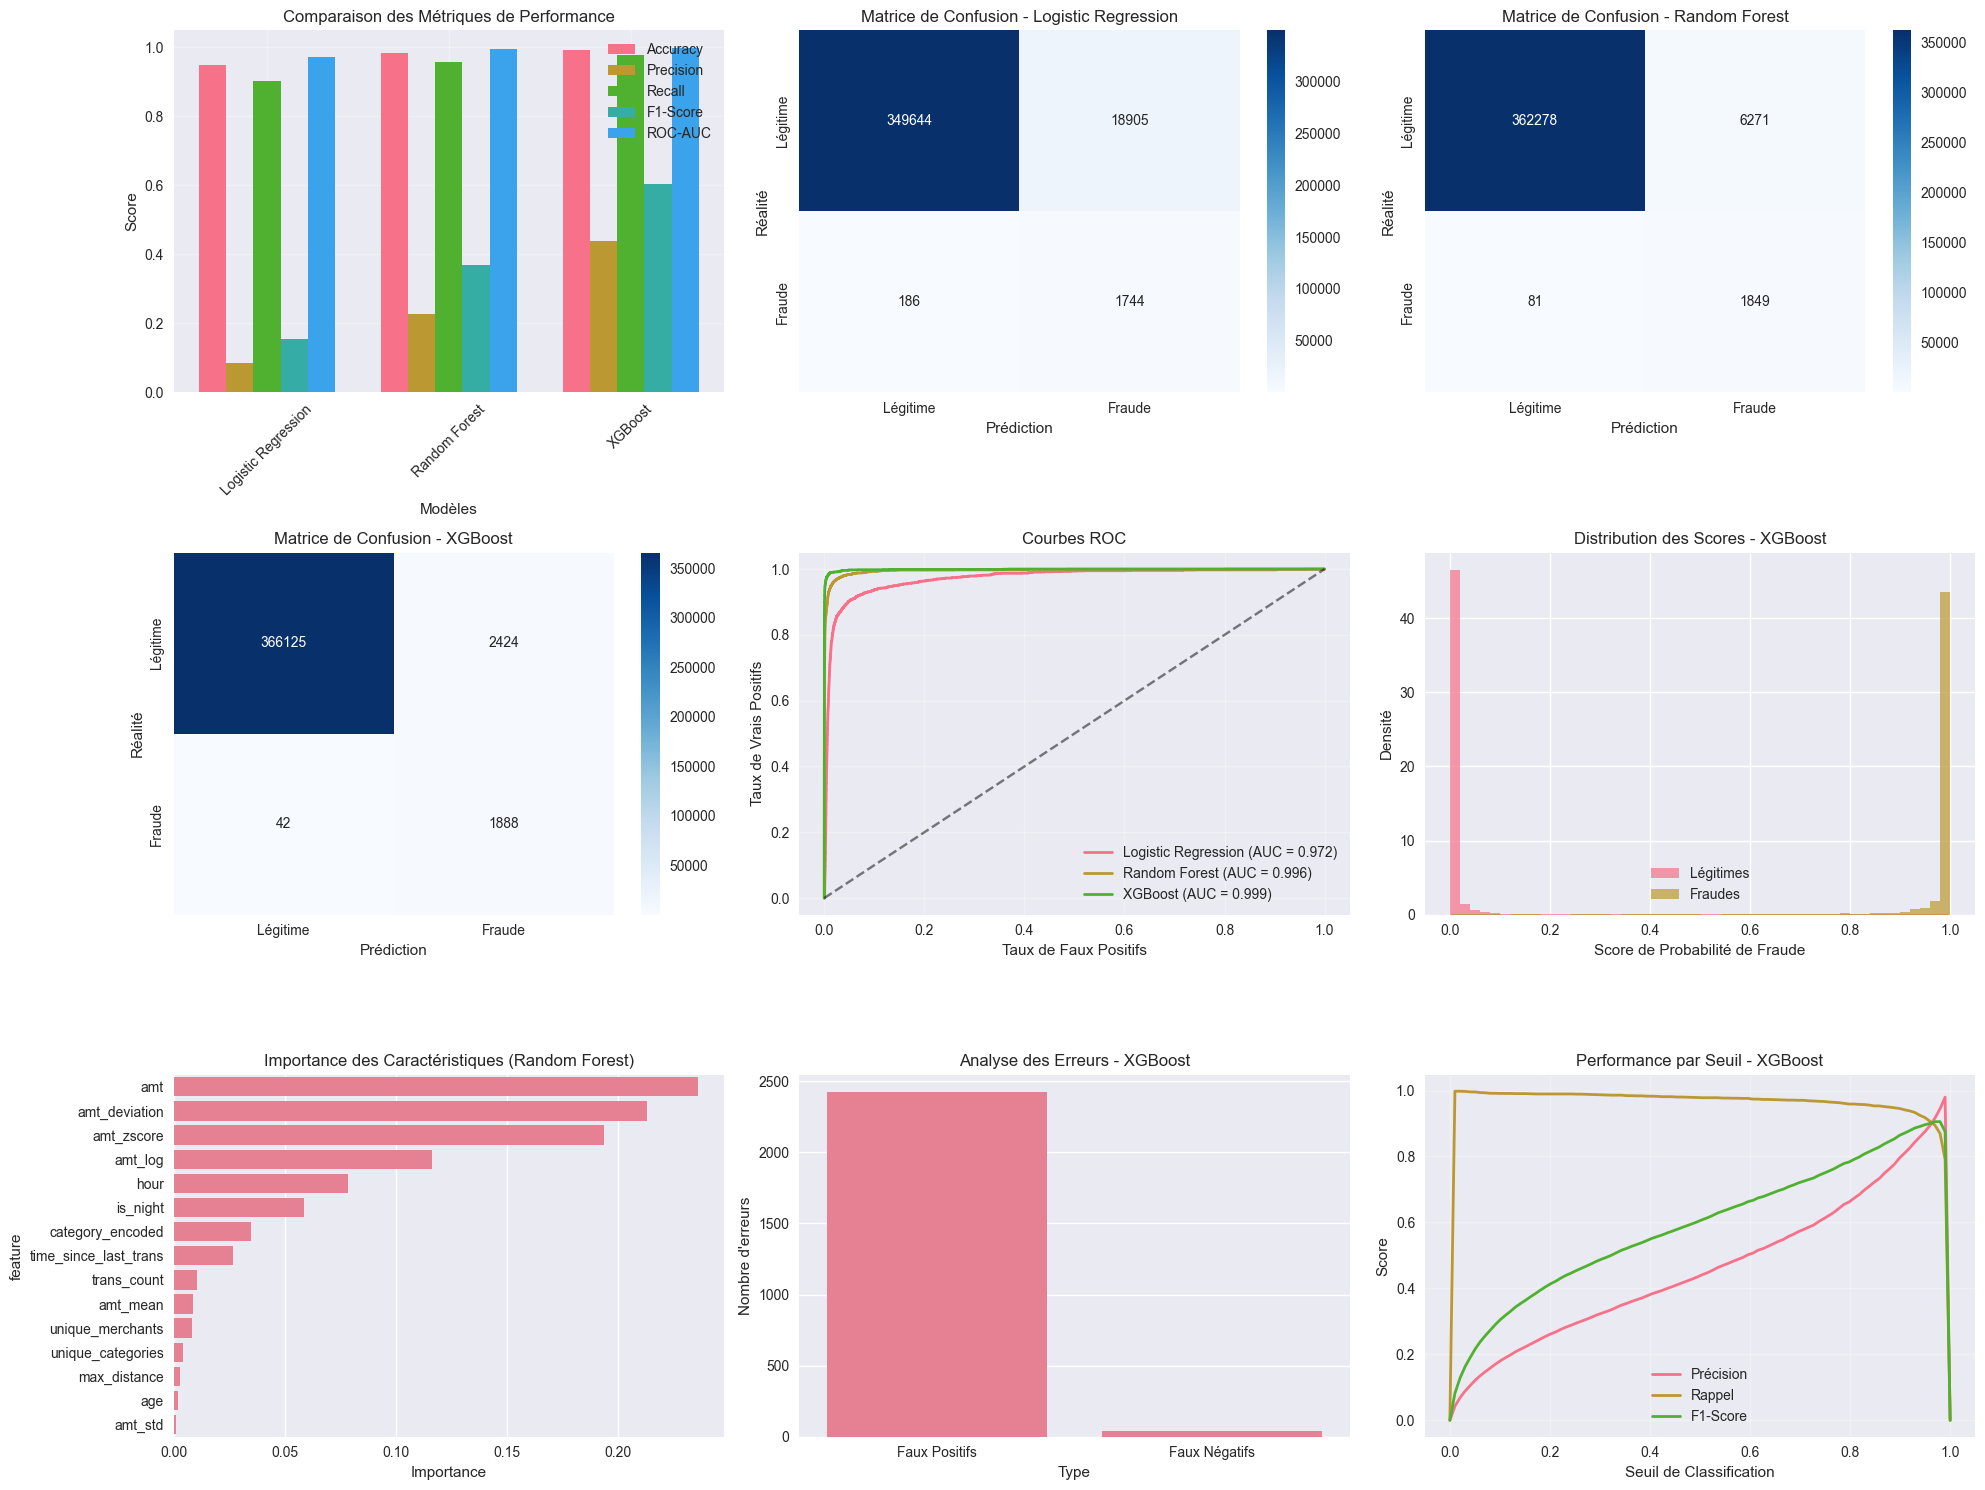


📋 Rapport de classification détaillé - XGBoost:
              precision    recall  f1-score   support

    Légitime       1.00      0.99      1.00    368549
      Fraude       0.44      0.98      0.60      1930

    accuracy                           0.99    370479
   macro avg       0.72      0.99      0.80    370479
weighted avg       1.00      0.99      0.99    370479


 Analyse des coûts (estimation):
Faux positifs: 2424 × 10$ = 24240$
Faux négatifs: 42 × 1000$ = 42000$
Coût total estimé: 66240$

🏆 Meilleur modèle: XGBoost
ROC-AUC: 0.9989


In [17]:
plt.figure(figsize=(20, 15))

# Comparaison des métriques
plt.subplot(3, 3, 1)
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
x = np.arange(len(results_df))
width = 0.15

for i, metric in enumerate(metrics_to_plot):
    plt.bar(x + i*width, results_df[metric], width, label=metric)

plt.xlabel('Modèles')
plt.ylabel('Score')
plt.title('Comparaison des Métriques de Performance')
plt.xticks(x + width*2, results_df['Model'], rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

# Matrices de confusion
for i, (name, result) in enumerate(results.items()):
    plt.subplot(3, 3, i+2)
    cm = confusion_matrix(y_test, result['predictions'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Légitime', 'Fraude'],
                yticklabels=['Légitime', 'Fraude'])
    plt.title(f'Matrice de Confusion - {name}')
    plt.xlabel('Prédiction')
    plt.ylabel('Réalité')

# Courbes ROC
plt.subplot(3, 3, 5)
for name, result in results.items():
    fpr, tpr, _ = roc_curve(y_test, result['probabilities'])
    auc_score = roc_auc_score(y_test, result['probabilities'])
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.3f})', linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbes ROC')
plt.legend()
plt.grid(True, alpha=0.3)

# Distribution des scores de probabilité
plt.subplot(3, 3, 6)
best_model_name = results_df.loc[results_df['ROC-AUC'].idxmax(), 'Model']
best_probas = results[best_model_name]['probabilities']

plt.hist(best_probas[y_test == 0], bins=50, alpha=0.7, label='Légitimes', density=True)
plt.hist(best_probas[y_test == 1], bins=50, alpha=0.7, label='Fraudes', density=True)
plt.xlabel('Score de Probabilité de Fraude')
plt.ylabel('Densité')
plt.title(f'Distribution des Scores - {best_model_name}')
plt.legend()

# Importance des caractéristiques (Random Forest)
plt.subplot(3, 3, 7)
if 'Random Forest' in models:
    rf_importance = pd.DataFrame({
        'feature': features_to_use,
        'importance': models['Random Forest'].feature_importances_
    }).sort_values('importance', ascending=False).head(15)
    
    sns.barplot(data=rf_importance, x='importance', y='feature')
    plt.title('Importance des Caractéristiques (Random Forest)')
    plt.xlabel('Importance')

# Analyse des erreurs
plt.subplot(3, 3, 8)
best_predictions = results[best_model_name]['predictions']

# Faux positifs et faux négatifs
fp_indices = np.where((y_test == 0) & (best_predictions == 1))[0]
fn_indices = np.where((y_test == 1) & (best_predictions == 0))[0]

error_analysis = pd.DataFrame({
    'Type': ['Faux Positifs', 'Faux Négatifs'],
    'Nombre': [len(fp_indices), len(fn_indices)]
})

sns.barplot(data=error_analysis, x='Type', y='Nombre')
plt.title(f'Analyse des Erreurs - {best_model_name}')
plt.ylabel('Nombre d\'erreurs')

# Performance par seuil
plt.subplot(3, 3, 9)
thresholds = np.linspace(0, 1, 100)
precision_scores = []
recall_scores = []
f1_scores = []

for threshold in thresholds:
    y_pred_thresh = (best_probas >= threshold).astype(int)
    if len(np.unique(y_pred_thresh)) > 1:  # Éviter la division par zéro
        precision_scores.append(precision_score(y_test, y_pred_thresh, zero_division=0))
        recall_scores.append(recall_score(y_test, y_pred_thresh, zero_division=0))
        f1_scores.append(f1_score(y_test, y_pred_thresh, zero_division=0))
    else:
        precision_scores.append(0)
        recall_scores.append(0)
        f1_scores.append(0)

plt.plot(thresholds, precision_scores, label='Précision', linewidth=2)
plt.plot(thresholds, recall_scores, label='Rappel', linewidth=2)
plt.plot(thresholds, f1_scores, label='F1-Score', linewidth=2)
plt.xlabel('Seuil de Classification')
plt.ylabel('Score')
plt.title(f'Performance par Seuil - {best_model_name}')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Rapport de classification détaillé pour le meilleur modèle
print(f"\n📋 Rapport de classification détaillé - {best_model_name}:")
print("="*60)
print(classification_report(y_test, results[best_model_name]['predictions'], 
                          target_names=['Légitime', 'Fraude']))

# Analyse des coûts (exemple)
print(f"\n Analyse des coûts (estimation):")
print("="*40)
fp_cost = len(fp_indices) * 10  # Coût d'un faux positif (investigation)
fn_cost = len(fn_indices) * 1000  # Coût d'un faux négatif (perte)
total_cost = fp_cost + fn_cost

print(f"Faux positifs: {len(fp_indices)} × 10$ = {fp_cost}$")
print(f"Faux négatifs: {len(fn_indices)} × 1000$ = {fn_cost}$")
print(f"Coût total estimé: {total_cost}$")

print(f"\n🏆 Meilleur modèle: {best_model_name}")
print(f"ROC-AUC: {results_df.loc[results_df['ROC-AUC'].idxmax(), 'ROC-AUC']:.4f}")

🎯 Application du meilleur modèle pour la détection de fraude
Modèle sélectionné: XGBoost
Seuil optimal: 0.981
F1-Score optimal: 0.906

📊 Performance avec seuil optimal:
Précision: 0.948
Rappel: 0.868
F1-Score: 0.906

🔍 Analyse de la détection:
Transactions signalées comme frauduleuses: 1,768
Vraies fraudes dans le dataset: 1,930
Fraudes correctement détectées: 1,676
Taux de détection: 86.8%

📈 Profil des transactions frauduleuses détectées:
Montant moyen: 576.03$
Distance moyenne du domicile: 76.98 km
Catégories les plus fréquentes:
category
shopping_net     448
grocery_pos      433
misc_net         248
shopping_pos     194
gas_transport    138
Name: count, dtype: int64

📈 Profil des transactions frauduleuses détectées:
Montant moyen: 576.03$
Distance moyenne du domicile: 76.98 km
Catégories les plus fréquentes:
category
shopping_net     448
grocery_pos      433
misc_net         248
shopping_pos     194
gas_transport    138
Name: count, dtype: int64


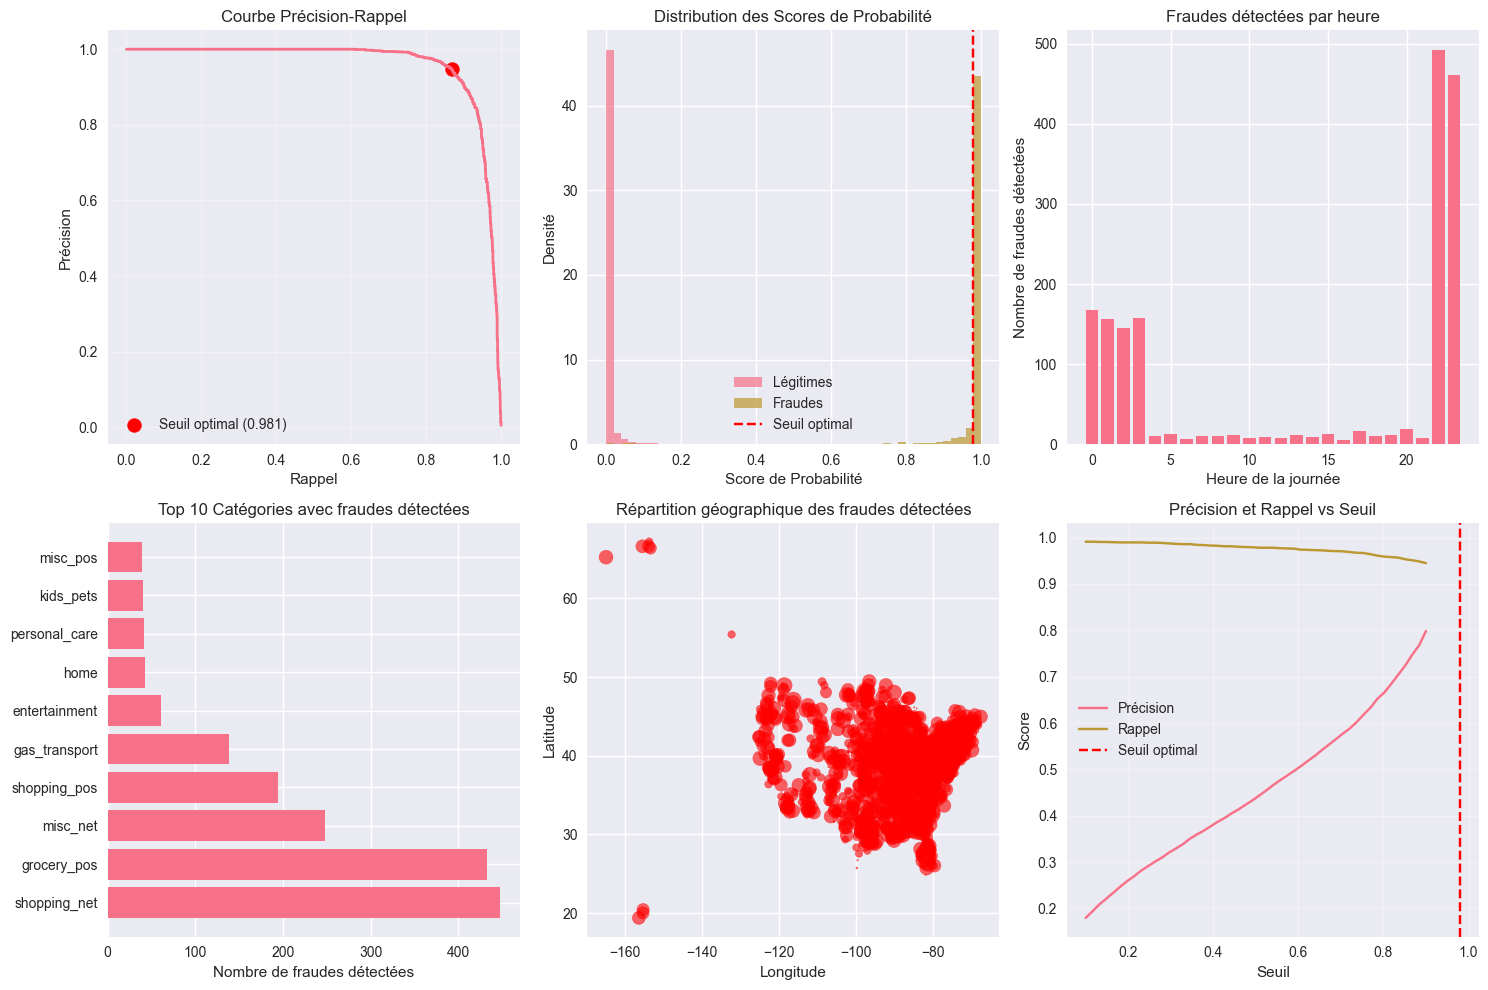


🛡️ Système de détection de fraude configuré!
Utilisez la fonction predict_fraud() pour analyser de nouvelles transactions.

 Exemple d'utilisation:
Transaction exemple:
  - Fraude prédite: Non
  - Probabilité: 0.106
  - Confiance: 0.787
  - Vraie étiquette: Légitime


In [ ]:
print("Application du meilleur modèle pour la détection de fraude")
print("="*60)

# Sélection du meilleur modèle
best_model_name = results_df.loc[results_df['ROC-AUC'].idxmax(), 'Model']
best_model = models[best_model_name]

print(f"Modèle sélectionné: {best_model_name}")

# Optimisation du seuil de classification
from sklearn.metrics import precision_recall_curve

# Utilisation des bonnes données selon le modèle
if best_model_name == 'Logistic Regression':
    test_data_for_best = X_test_scaled
else:
    test_data_for_best = X_test

y_scores = best_model.predict_proba(test_data_for_best)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Recherche du seuil optimal (maximisation du F1-score)
f1_scores_threshold = 2 * (precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1])
optimal_threshold_idx = np.argmax(f1_scores_threshold)
optimal_threshold = thresholds[optimal_threshold_idx]

print(f"Seuil optimal: {optimal_threshold:.3f}")
print(f"F1-Score optimal: {f1_scores_threshold[optimal_threshold_idx]:.3f}")

# Prédictions avec le seuil optimal
y_pred_optimal = (y_scores >= optimal_threshold).astype(int)

print(f"\n📊 Performance avec seuil optimal:")
print(f"Précision: {precision_score(y_test, y_pred_optimal):.3f}")
print(f"Rappel: {recall_score(y_test, y_pred_optimal):.3f}")
print(f"F1-Score: {f1_score(y_test, y_pred_optimal):.3f}")

# Analyse des transactions frauduleuses détectées
fraud_detected = np.where(y_pred_optimal == 1)[0]
actual_frauds = np.where(y_test == 1)[0]
correctly_detected = np.intersect1d(fraud_detected, actual_frauds)

print(f"\n Analyse de la détection:")
print(f"Transactions signalées comme frauduleuses: {len(fraud_detected):,}")
print(f"Vraies fraudes dans le dataset: {len(actual_frauds):,}")
print(f"Fraudes correctement détectées: {len(correctly_detected):,}")
print(f"Taux de détection: {len(correctly_detected)/len(actual_frauds)*100:.1f}%")

# Analyse des caractéristiques des fraudes détectées
detected_fraud_indices = X_test.index[fraud_detected]
fraud_analysis_df = df.loc[detected_fraud_indices].copy()

print(f"\n📈 Profil des transactions frauduleuses détectées:")
print("="*50)
print(f"Montant moyen: {fraud_analysis_df['amt'].mean():.2f}$")
print(f"Distance moyenne du domicile: {fraud_analysis_df['distance_from_home'].mean():.2f} km")
print(f"Catégories les plus fréquentes:")
print(fraud_analysis_df['category'].value_counts().head())

# Visualisation de la courbe précision-rappel
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.plot(recall, precision, linewidth=2)
plt.scatter(recall[optimal_threshold_idx], precision[optimal_threshold_idx], 
           color='red', s=100, label=f'Seuil optimal ({optimal_threshold:.3f})')
plt.xlabel('Rappel')
plt.ylabel('Précision')
plt.title('Courbe Précision-Rappel')
plt.legend()
plt.grid(True, alpha=0.3)

# Distribution des scores pour les vraies fraudes vs légitimes
plt.subplot(2, 3, 2)
plt.hist(y_scores[y_test == 0], bins=50, alpha=0.7, label='Légitimes', density=True)
plt.hist(y_scores[y_test == 1], bins=50, alpha=0.7, label='Fraudes', density=True)
plt.axvline(optimal_threshold, color='red', linestyle='--', label=f'Seuil optimal')
plt.xlabel('Score de Probabilité')
plt.ylabel('Densité')
plt.title('Distribution des Scores de Probabilité')
plt.legend()

# Analyse temporelle des fraudes détectées
plt.subplot(2, 3, 3)
fraud_analysis_df['hour_pred'] = fraud_analysis_df['hour']
hourly_detection = fraud_analysis_df['hour_pred'].value_counts().sort_index()
plt.bar(hourly_detection.index, hourly_detection.values)
plt.xlabel('Heure de la journée')
plt.ylabel('Nombre de fraudes détectées')
plt.title('Fraudes détectées par heure')

# Analyse par catégorie de marchand
plt.subplot(2, 3, 4)
category_detection = fraud_analysis_df['category'].value_counts().head(10)
plt.barh(range(len(category_detection)), category_detection.values)
plt.yticks(range(len(category_detection)), category_detection.index)
plt.xlabel('Nombre de fraudes détectées')
plt.title('Top 10 Catégories avec fraudes détectées')

# Analyse géographique
plt.subplot(2, 3, 5)
plt.scatter(fraud_analysis_df['merch_long'], fraud_analysis_df['merch_lat'], 
           s=fraud_analysis_df['amt']*0.1, alpha=0.6, c='red')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Répartition géographique des fraudes détectées')

# Performance vs seuil
plt.subplot(2, 3, 6)
thresholds_range = np.linspace(0.1, 0.9, 50)
precision_vals = []
recall_vals = []

for thresh in thresholds_range:
    y_pred_thresh = (y_scores >= thresh).astype(int)
    if len(np.unique(y_pred_thresh)) > 1:
        precision_vals.append(precision_score(y_test, y_pred_thresh))
        recall_vals.append(recall_score(y_test, y_pred_thresh))
    else:
        precision_vals.append(0)
        recall_vals.append(0)

plt.plot(thresholds_range, precision_vals, label='Précision')
plt.plot(thresholds_range, recall_vals, label='Rappel')
plt.axvline(optimal_threshold, color='red', linestyle='--', label='Seuil optimal')
plt.xlabel('Seuil')
plt.ylabel('Score')
plt.title('Précision et Rappel vs Seuil')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

def predict_fraud(transaction_data, model, scaler=None, threshold=optimal_threshold):
    """
    Prédit si une transaction est frauduleuse
    
    Args:
        transaction_data: array-like, données de la transaction
        model: modèle entraîné
        scaler: scaler pour normaliser les données (si nécessaire)
        threshold: seuil de classification
    
    Returns:
        dict: résultat de la prédiction
    """
    if scaler is not None:
        transaction_data = scaler.transform([transaction_data])
    else:
        transaction_data = np.array([transaction_data])
    
    probability = model.predict_proba(transaction_data)[0, 1]
    prediction = 1 if probability >= threshold else 0
    
    return {
        'is_fraud': prediction,
        'fraud_probability': probability,
        'confidence': abs(probability - 0.5) * 2
    }

print(f"\n🛡️ Système de détection de fraude configuré!")
print(f"Utilisez la fonction predict_fraud() pour analyser de nouvelles transactions.")

print(f"Exemple d'utilisation:")
sample_transaction = X_test.iloc[0].values
if best_model_name == 'Logistic Regression':
    sample_scaled = scaler.transform([sample_transaction])[0]
    result = predict_fraud(sample_scaled, best_model, threshold=optimal_threshold)
else:
    result = predict_fraud(sample_transaction, best_model, threshold=optimal_threshold)

print(f"Transaction exemple:")
print(f"  - Fraude prédite: {'Oui' if result['is_fraud'] else 'Non'}")
print(f"  - Probabilité: {result['fraud_probability']:.3f}")
print(f"  - Confiance: {result['confidence']:.3f}")
print(f"  - Vraie étiquette: {'Fraude' if y_test.iloc[0] else 'Légitime'}")